In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import pickle
import glob
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import numpy as np
from cycler import cycler
%matplotlib inline

from scipy import stats

In [2]:
t_titre = 17 #35
t_label = 12 #25
fig_width = 7 #15

In [3]:
liste = []
for fname in glob.glob('data/*pkl'):
    a = fname.split('/')[1].split('.')[0].split('_')
    liste.append(a)
    print(a)

['pari', 'FM', '2017-09-26', '143606']
['pari', 'LB', '2017-09-19', '152205']
['enregistrement', 'LB', '2017-09-20', '151043']
['pari', 'DC', '2017-09-26', '162348']
['pari', 'IP', '2017-09-26', '122431']
['pari', 'BMC', '2017-09-25', '142503']
['enregistrement', 'IP', '2017-09-28', '115250']
['enregistrement', 'BMC', '2017-09-26', '095637']
['pari', 'CS', '2017-09-28', '154353']
['enregistrement', 'DC', '2017-09-27', '161040']


In [4]:
exp = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['BMC','CS','DC','FM','IP','LB'] :
        a = 'data/%s_%s_%s_%s.pkl'%(liste[x][0], liste[x][1],liste[x][2],liste[x][3])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            exp.append(b)

In [5]:
param = []
for x in range(len(liste)) :
    if liste[x][0]=='pari' and liste[x][1] in ['BMC','CS','DC','FM','IP','LB'] :
        a = 'parametre/%s_param_Fit.pkl'%(liste[x][1])
        with open(a, 'rb') as fichier :
            b = pickle.load(fichier, encoding='latin1')
            b['observer'] = liste[x][1]
            param.append(b)

In [6]:
N_blocks = 3
N_trials = 200

# liste de tout
full_proba = []
full_results = []
full_va = []
full_bino = []
full_va_refocus = []

mean_anti = []
va_refocus = []

# listes de tout par sujet
full_proba_sujet = []
full_results_sujet = []
full_va_sujet = []
full_bino_sujet = []
full_va_refocus_sujet = []

#for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
for x in range(len(param)) :
    
    p = exp[x]['p']
    proba = p[:,:,1]
    bino = p[:,:,0]
    v_anti = param[x]['v_anti']
    results = (exp[x]['results']+1)/2
    
    va_refocus.append([])
    mean_anti.append(np.mean(np.array(param[x]['v_anti'])))
    
    palapala=[]
    tchoutchou=[]
    niakniak=[]
    loupi=[]
    chocapik=[]
    
    for block in range(N_blocks) :
        
        va_refocus[x].append([])
        
        for trial in range(N_trials):
            full_proba.append(proba[trial, block])
            full_results.append(results[trial, block])
            full_va.append(v_anti[block][trial])
            full_bino.append(bino[trial, block])
            
            full_va_refocus.append(v_anti[block][trial] - mean_anti[x])
            va_refocus[x][block].append(v_anti[block][trial] - mean_anti[x])
            
            tchoutchou.append(results[trial, block])
            palapala.append(proba[trial, block])
            niakniak.append(v_anti[block][trial])
            loupi.append(v_anti[block][trial] - mean_anti[x])
            chocapik.append(bino[trial, block])
            
    full_proba_sujet.append(palapala)
    full_results_sujet.append(tchoutchou)
    full_va_sujet.append(niakniak)
    full_va_refocus_sujet.append(loupi)
    full_bino_sujet.append(chocapik)

In [7]:
print(full_proba_sujet[0]==full_proba_sujet[1])
print(np.shape(full_proba_sujet))

True
(6, 600)


### - les 15 premier essais après le switch

In [8]:
proba_switch_x = []
liste_switch_x = []

block_result_switch_x = []
block_va_switch_x = []

proba_x = []
bino_x = []

block_va_refocus_switch_x = []

for x in range(len(exp)):

    N_trials = exp[x]['N_trials']
    N_blocks = exp[x]['N_blocks']
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    v_anti = param[x]['v_anti']
    
    liste_switch = []
    proba_switch = []
    result_switch = []
    v_anti_switch = []
    prob = []
    bi = []
    
    va_refocus_switch = []
    
    for block in range(N_blocks):

        switch = [0]
        p_switch = [p[0, block, 1]]
        for s in range(N_trials):
            if p[s, block, 2]==1 :
                switch.append(s)
                p_switch.append(p[s, block, 1])
        switch.append(N_trials)

        liste_switch.append(switch)
        proba_switch.append(p_switch)

        #liste_result_switch = []
        #liste_v_anti_switch = []
        #liste_proba = []
        
        for s1 in range(len(switch)-1) :

            for lala in np.arange(switch[s1]+15, switch[s1+1]) :
                result_switch.append(results[lala, block])
                v_anti_switch.append(v_anti[block][lala])
                prob.append(p[lala, block, 1])
                bi.append(p[lala, block, 0])

                va_refocus_switch.append(np.array(v_anti[block][lala])-mean_anti[x])
                
    proba_switch_x.append(proba_switch)
    liste_switch_x.append(liste_switch)
    block_result_switch_x.append(result_switch)
    block_va_switch_x.append(v_anti_switch)
    proba_x.append(prob)
    bino_x.append(bi)
    
    block_va_refocus_switch_x.append(va_refocus_switch)

In [9]:
full_proba_x = []
full_results_x = []
full_va_x = []
full_bino_x = []

full_va_refocus_x =[]

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):

    proba = proba_x[x]
    v_anti = block_va_switch_x[x]
    results = block_result_switch_x[x]
    bino = bino_x[x]
    
    v_anti_mean = block_va_refocus_switch_x[x]
    
    for trial in range(len(proba)):
        full_proba_x.append(proba[trial])
        full_results_x.append(results[trial])
        full_va_x.append(v_anti[trial])
        full_bino_x.append(bino[trial])
        
        full_va_refocus_x.append(v_anti_mean[trial])

## Probabilité réel

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


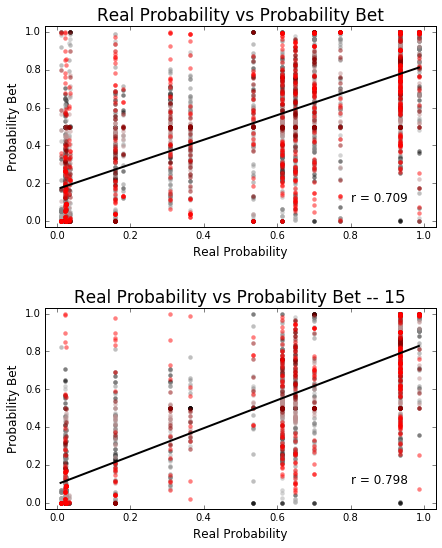

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(fig_width, (fig_width*2)/1.6180))

axs[0].axis([-0.032, 1.032, -0.032, 1.032])
axs[1].axis([-0.032, 1.032, -0.032, 1.032])
plt.subplots_adjust(hspace=0.4)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):

    p = exp[x]['p']
    results = (exp[x]['results']+1)/2
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    axs[0].scatter(p[:,:,1], results, c=color, alpha=0.5, linewidths=0)
    
    p_x = proba_x[x]
    results_x = block_result_switch_x[x] #(exp[x]['results']+1)/2

    axs[1].scatter(p_x, results_x, c=color, alpha=0.5, linewidths=0)

slope, intercept, r_value, p_value, std_err = stats.linregress(full_proba, full_results)
x_test = np.linspace(np.min(full_proba), np.max(full_proba), 100)
fitLine = slope * x_test + intercept
axs[0].plot(x_test, fitLine, c='k', linewidth=2)
axs[0].text(0.8,0.1, 'r = %0.3f'%(r_value), fontsize=t_label)
axs[0].set_title("Real Probability vs Probability Bet", fontsize=t_titre)
axs[0].set_xlabel('Real Probability', fontsize=t_label)
axs[0].set_ylabel('Probability Bet', fontsize=t_label)


slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(full_proba_x, full_results_x)
x_test_x = np.linspace(np.min(full_proba_x), np.max(full_proba_x), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs[1].plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs[1].text(0.8,0.1, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs[1].set_title("Real Probability vs Probability Bet -- 15", fontsize=t_titre)
axs[1].set_xlabel('Real Probability', fontsize=t_label)
axs[1].set_ylabel('Probability Bet', fontsize=t_label)

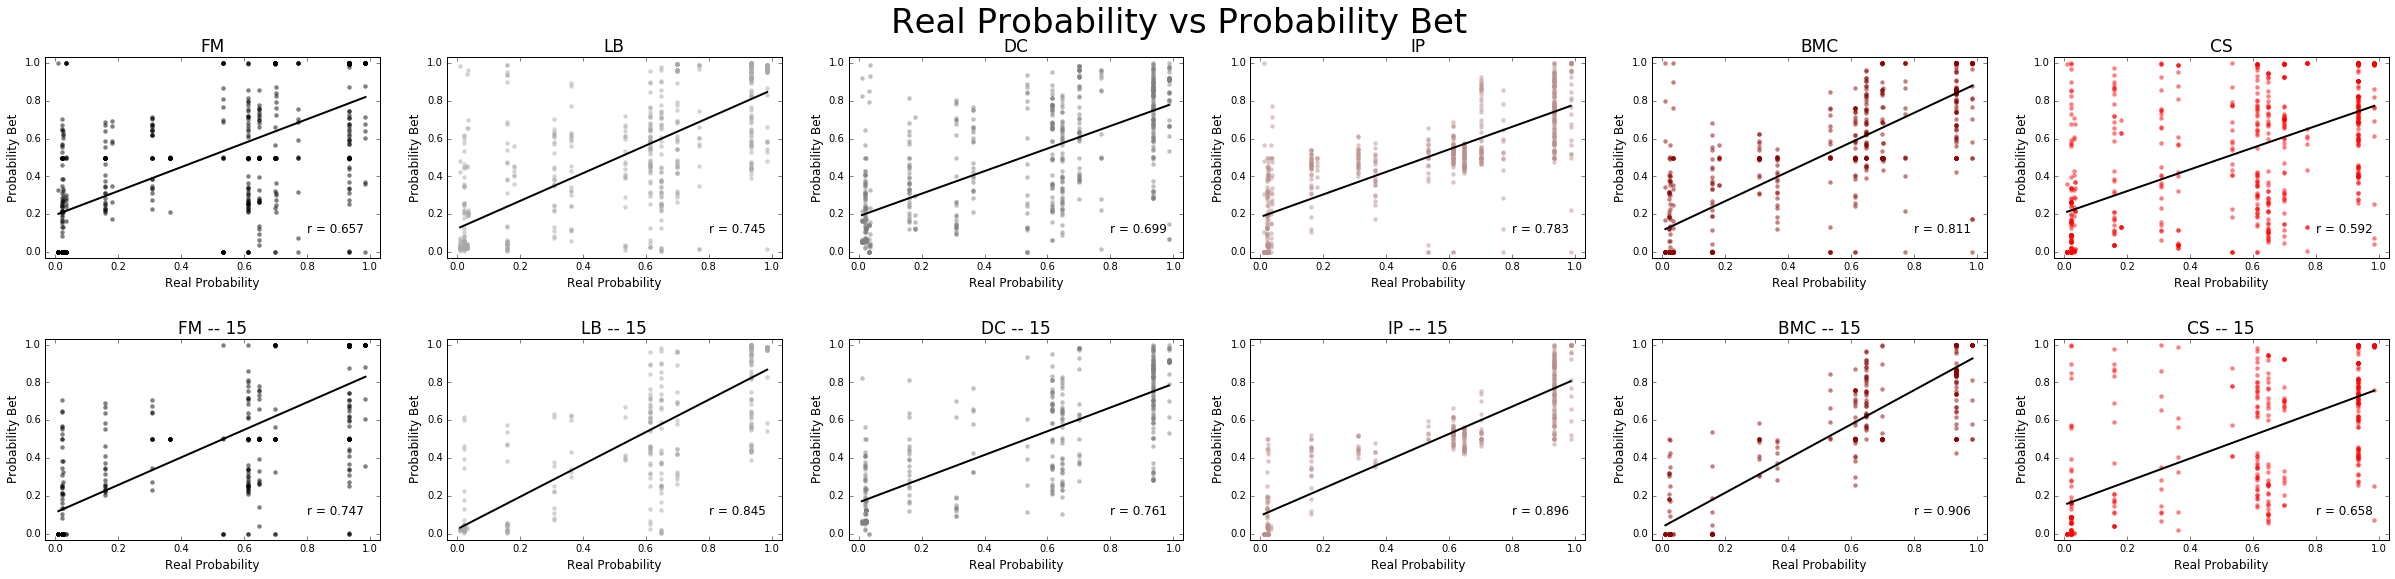

In [11]:
fig, axs = plt.subplots(2, 6, figsize=(fig_width*6, (fig_width*2)/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability vs Probability Bet", fontsize=t_titre*2)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    
    axs[0][x].axis([-0.032, 1.032, -0.032, 1.032])
    axs[1][x].axis([-0.032, 1.032, -0.032, 1.032])
    
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2

    axs[0][x].scatter(p[:,:,1], results, c=color, alpha=0.5, linewidths=0)
    
    p_x = proba_x[x]
    results_x = block_result_switch_x[x] #(exp[x]['results']+1)/2

    axs[1][x].scatter(p_x, results_x, c=color, alpha=0.5, linewidths=0)

    slope, intercept, r_value, p_value, std_err = stats.linregress(full_proba_sujet[x], full_results_sujet[x])
    x_test = np.linspace(np.min(full_proba_sujet[x]), np.max(full_proba_sujet[x]), 100)
    fitLine = slope * x_test + intercept
    axs[0][x].plot(x_test, fitLine, c='k', linewidth=2)
    axs[0][x].text(0.8,0.1, 'r = %0.3f'%(r_value), fontsize=t_label)
    axs[0][x].set_title("%s"%exp[x]['observer'], fontsize=t_titre)
    axs[0][x].set_xlabel('Real Probability', fontsize=t_label)
    axs[0][x].set_ylabel('Probability Bet', fontsize=t_label)


    slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(p_x, results_x)
    x_test_x = np.linspace(np.min(p_x), np.max(p_x), 100)
    fitLine_x = slope_x * x_test_x + intercept_x
    axs[1][x].plot(x_test_x, fitLine_x, c='k', linewidth=2)
    axs[1][x].text(0.8,0.1, 'r = %0.3f'%(r_value_x), fontsize=t_label)
    axs[1][x].set_title("%s -- 15"%exp[x]['observer'], fontsize=t_titre)
    axs[1][x].set_xlabel('Real Probability', fontsize=t_label)
    axs[1][x].set_ylabel('Probability Bet', fontsize=t_label)

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


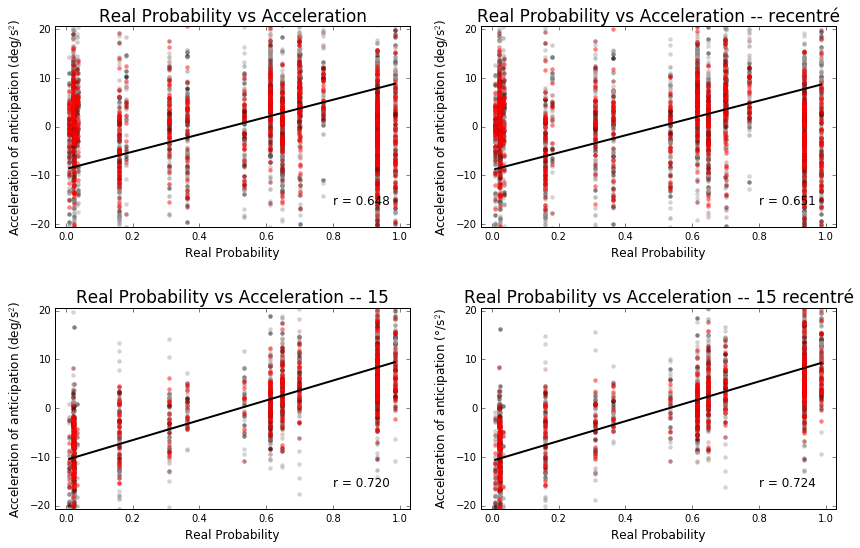

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(fig_width*2, (fig_width*2)/(1.6180)))
axs[0][0].axis([-0.032, 1.032, -20.64, 20.64])
axs[0][1].axis([-0.032, 1.032, -20.64, 20.64])
axs[1][0].axis([-0.032, 1.032, -20.64, 20.64])
axs[1][1].axis([-0.032, 1.032, -20.64, 20.64])
plt.subplots_adjust(hspace=0.4)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    
    p = exp[x]['p']
    v_anti_0_1 = param[x]['v_anti']
    axs[0][0].scatter(p[:,:,1], v_anti_0_1, c=color, alpha=0.5, linewidths=0)
    axs[0][1].scatter(p[:,:,1], va_refocus[x], c=color, alpha=0.5, linewidths=0)

    p_x = proba_x[x]
    v_anti_0_1_x = block_va_switch_x[x]
    v_anti_mean = block_va_refocus_switch_x[x]
    axs[1][0].scatter(p_x, v_anti_0_1_x, c=color, alpha=0.5, linewidths=0)
    axs[1][1].scatter(p_x, v_anti_mean, c=color, alpha=0.5, linewidths=0)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(full_proba, full_va)
x_test = np.linspace(np.min(full_proba), np.max(full_proba), 100)
fitLine = slope * x_test + intercept
axs[0][0].plot(x_test, fitLine, c='k', linewidth=2)
axs[0][0].text(0.8,-16, 'r = %0.3f'%(r_value), fontsize=t_label)
axs[0][0].set_title("Real Probability vs Acceleration", fontsize=t_titre)
axs[0][0].set_xlabel('Real Probability', fontsize=t_label)
axs[0][0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

slope_c0, intercept_c0, r_value_c0, p_value_c0, std_err_c0 = stats.linregress(full_proba, full_va_refocus)
fitLine_c0 = slope_c0 * x_test + intercept_c0
axs[0][1].plot(x_test, fitLine_c0, c='k', linewidth=2)
axs[0][1].text(0.8,-16, 'r = %0.3f'%(r_value_c0), fontsize=t_label)
axs[0][1].set_title("Real Probability vs Acceleration -- recentré", fontsize=t_titre)
axs[0][1].set_xlabel('Real Probability', fontsize=t_label)
axs[0][1].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(full_proba_x, full_va_x)
x_test_x = np.linspace(np.min(full_proba_x), np.max(full_proba_x), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs[1][0].plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs[1][0].text(0.8,-16, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs[1][0].set_title("Real Probability vs Acceleration -- 15", fontsize=t_titre)
axs[1][0].set_xlabel('Real Probability', fontsize=t_label)
axs[1][0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)
    
slope_c0_x, intercept_c0_x, r_value_c0_x, p_value_c0_x, std_err_c0_x = stats.linregress(full_proba_x, full_va_refocus_x)
fitLine_c0_x = slope_c0_x * x_test_x + intercept_c0_x
axs[1][1].plot(x_test_x, fitLine_c0_x, c='k', linewidth=2)
axs[1][1].text(0.8,-16, 'r = %0.3f'%(r_value_c0_x), fontsize=t_label)
axs[1][1].set_title("Real Probability vs Acceleration -- 15 recentré", fontsize=t_titre)
axs[1][1].set_xlabel('Real Probability', fontsize=t_label)
axs[1][1].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

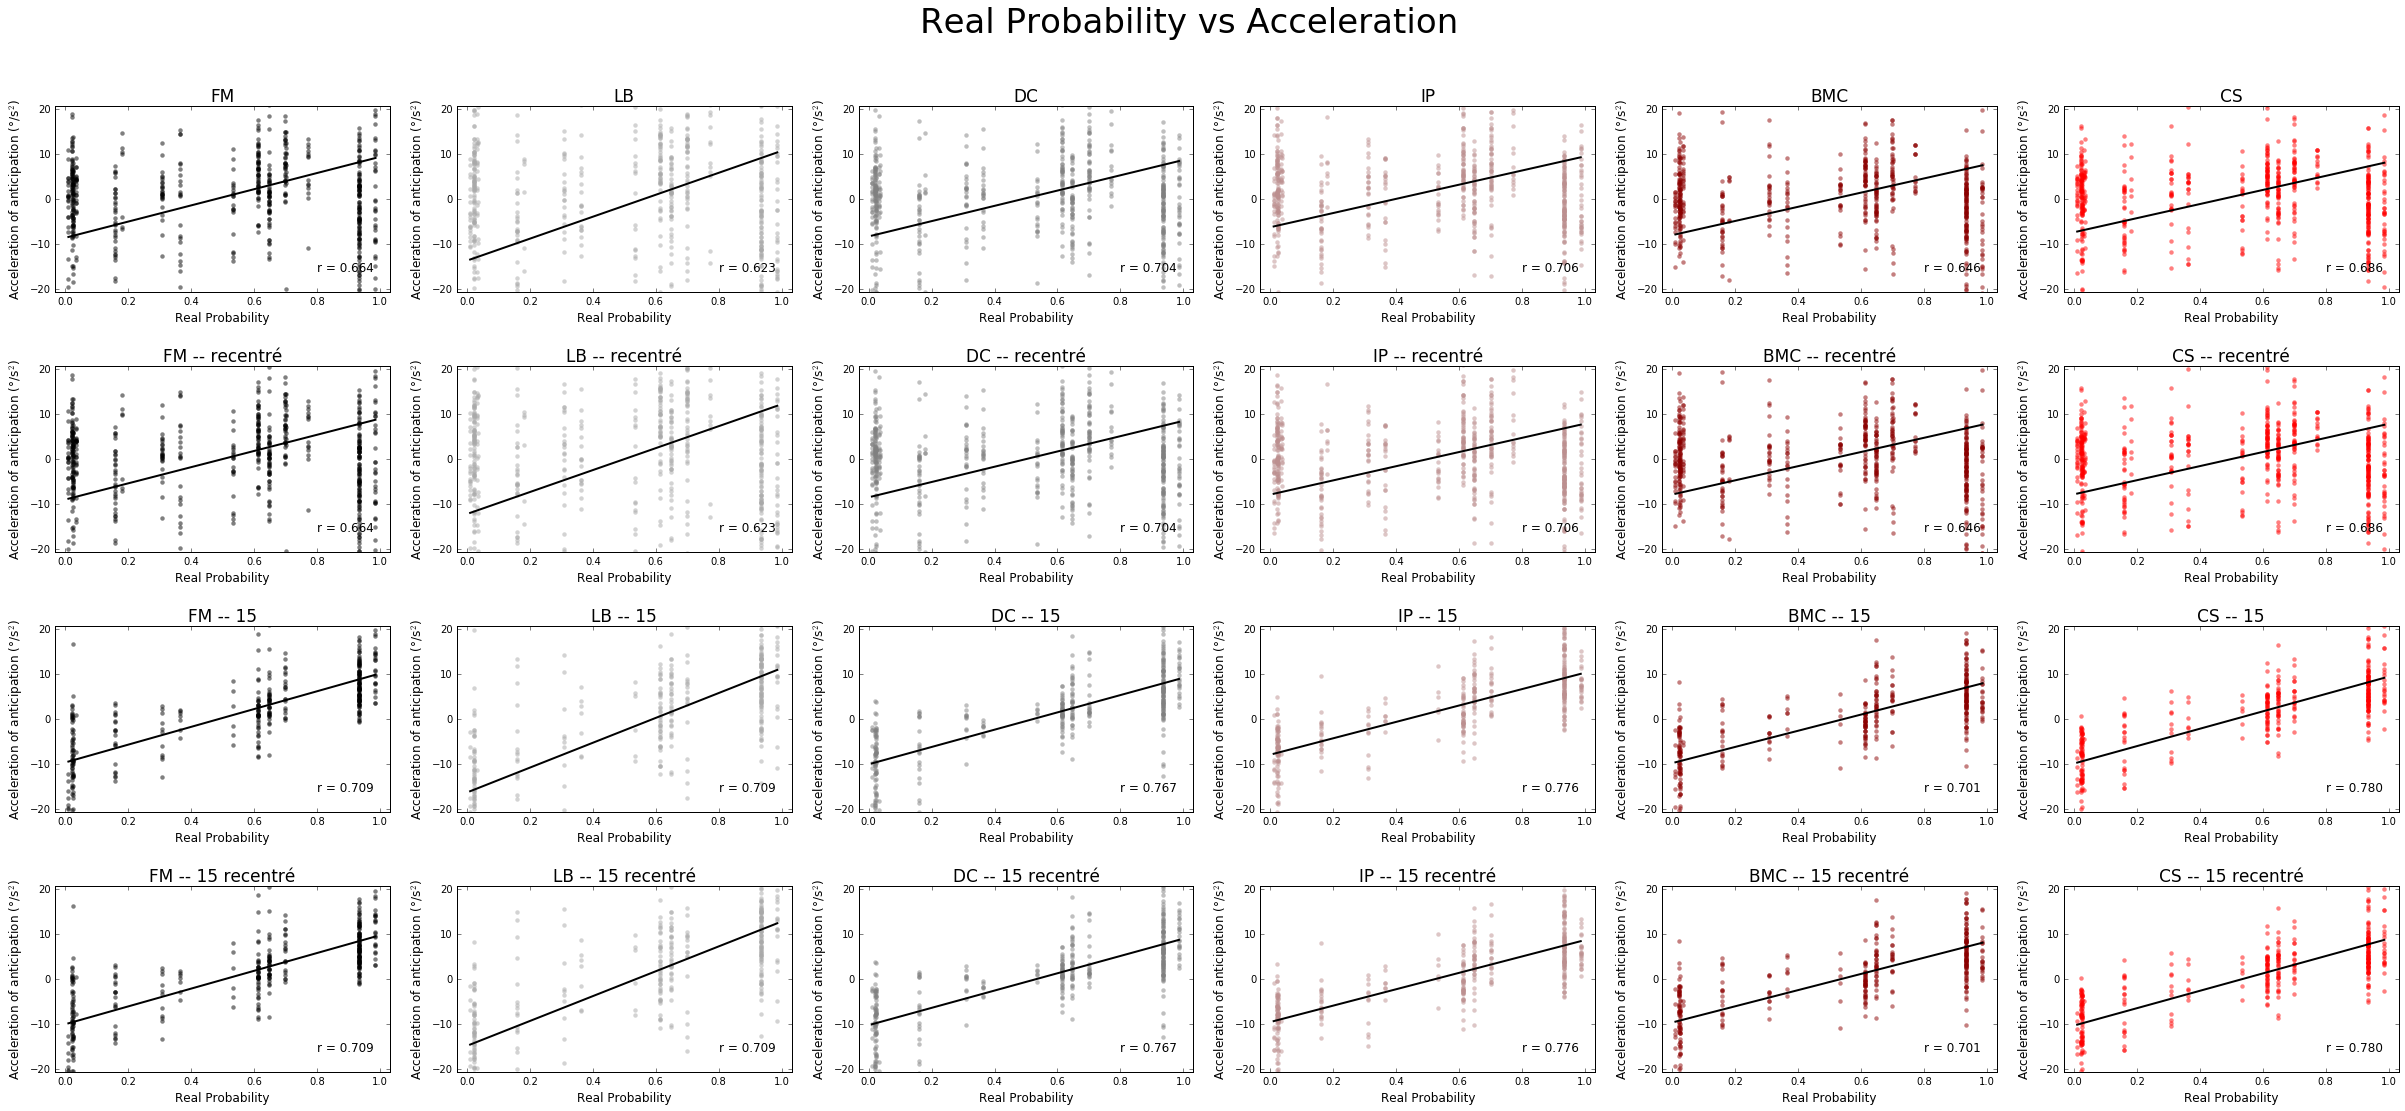

In [13]:
fig, axs = plt.subplots(4, 6, figsize=(fig_width*6, (fig_width*4)/(1.6180)))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Real Probability vs Acceleration", fontsize=t_titre*2)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    axs[0][x].axis([-0.032, 1.032, -20.64, 20.64])
    axs[1][x].axis([-0.032, 1.032, -20.64, 20.64])
    axs[2][x].axis([-0.032, 1.032, -20.64, 20.64])
    axs[3][x].axis([-0.032, 1.032, -20.64, 20.64])
    
    
    p = exp[x]['p']
    v_anti_0_1 = param[x]['v_anti']
    axs[0][x].scatter(p[:,:,1], v_anti_0_1, c=color, alpha=0.5, linewidths=0)
    axs[1][x].scatter(p[:,:,1], va_refocus[x], c=color, alpha=0.5, linewidths=0)

    p_x = proba_x[x]
    v_anti_0_1_x = block_va_switch_x[x]
    v_anti_mean = block_va_refocus_switch_x[x]
    axs[2][x].scatter(p_x, v_anti_0_1_x, c=color, alpha=0.5, linewidths=0)
    axs[3][x].scatter(p_x, v_anti_mean, c=color, alpha=0.5, linewidths=0)
    
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(full_proba_sujet[x], full_va_sujet[x])
    x_test = np.linspace(np.min(full_proba_sujet[x]), np.max(full_proba_sujet[x]), 100)
    fitLine = slope * x_test + intercept
    axs[0][x].plot(x_test, fitLine, c='k', linewidth=2)
    axs[0][x].text(0.8,-16, 'r = %0.3f'%(r_value), fontsize=t_label)
    axs[0][x].set_title("%s"%exp[x]['observer'], fontsize=t_titre)
    axs[0][x].set_xlabel('Real Probability', fontsize=t_label)
    axs[0][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

    slope_c0, intercept_c0, r_value_c0, p_value_c0, std_err_c0 = stats.linregress(full_proba_sujet[x], full_va_refocus_sujet[x])
    fitLine_c0 = slope_c0 * x_test + intercept_c0
    axs[1][x].plot(x_test, fitLine_c0, c='k', linewidth=2)
    axs[1][x].text(0.8,-16, 'r = %0.3f'%(r_value_c0), fontsize=t_label)
    axs[1][x].set_title("%s -- recentré"%exp[x]['observer'], fontsize=t_titre)
    axs[1][x].set_xlabel('Real Probability', fontsize=t_label)
    axs[1][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

    slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(p_x, v_anti_0_1_x)
    x_test_x = np.linspace(np.min(p_x), np.max(p_x), 100)
    fitLine_x = slope_x * x_test_x + intercept_x
    axs[2][x].plot(x_test_x, fitLine_x, c='k', linewidth=2)
    axs[2][x].text(0.8,-16, 'r = %0.3f'%(r_value_x), fontsize=t_label)
    axs[2][x].set_title("%s -- 15"%exp[x]['observer'], fontsize=t_titre)
    axs[2][x].set_xlabel('Real Probability', fontsize=t_label)
    axs[2][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

    slope_c0_x, intercept_c0_x, r_value_c0_x, p_value_c0_x, std_err_c0_x = stats.linregress(p_x, v_anti_mean)
    fitLine_c0_x = slope_c0_x * x_test_x + intercept_c0_x
    axs[3][x].plot(x_test_x, fitLine_c0_x, c='k', linewidth=2)
    axs[3][x].text(0.8,-16, 'r = %0.3f'%(r_value_c0_x), fontsize=t_label)
    axs[3][x].set_title("%s -- 15 recentré"%exp[x]['observer'], fontsize=t_titre)
    axs[3][x].set_xlabel('Real Probability', fontsize=t_label)
    axs[3][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


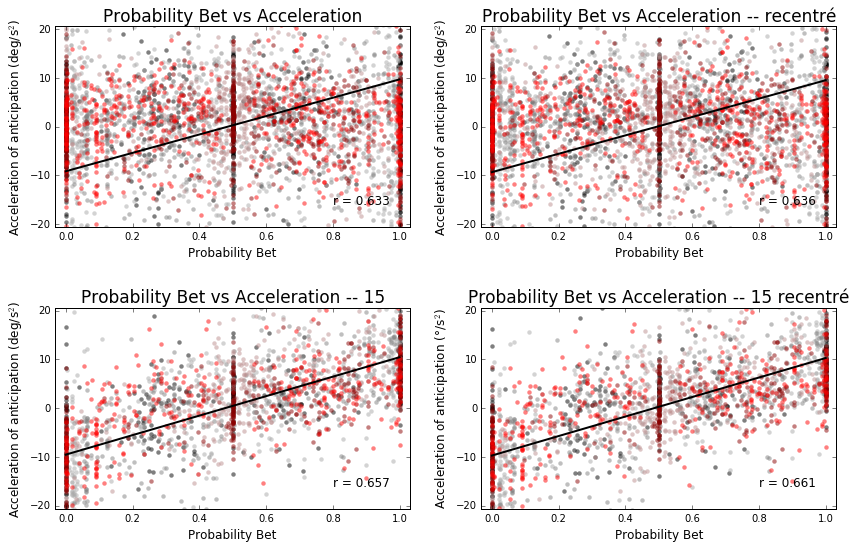

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(fig_width*2, (fig_width*2)/(1.6180)))
axs[0][0].axis([-0.032, 1.032, -20.64, 20.64])
axs[0][1].axis([-0.032, 1.032, -20.64, 20.64])
axs[1][0].axis([-0.032, 1.032, -20.64, 20.64])
axs[1][1].axis([-0.032, 1.032, -20.64, 20.64])

plt.subplots_adjust(hspace=0.4)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    v_anti_0_1 = param[x]['v_anti']
    axs[0][0].scatter(results, v_anti_0_1, c=color, alpha=0.5, linewidths=0)
    axs[0][1].scatter(results, va_refocus[x], c=color, alpha=0.5, linewidths=0)
    
    results_x = block_result_switch_x[x] #(exp[x]['results']+1)/2
    v_anti_0_1_x = block_va_switch_x[x] 
    v_anti_mean = block_va_refocus_switch_x[x]
    axs[1][0].scatter(results_x, v_anti_0_1_x, c=color, alpha=0.5, linewidths=0)
    axs[1][1].scatter(results_x, v_anti_mean, c=color, alpha=0.5, linewidths=0)
    
    
slope, intercept, r_value, p_value, std_err = stats.linregress(full_results, full_va)
x_test = np.linspace(np.min(full_results), np.max(full_results), 100)
fitLine = slope * x_test + intercept
axs[0][0].plot(x_test, fitLine, c='k', linewidth=2)
axs[0][0].text(0.8,-16, 'r = %0.3f'%(r_value), fontsize=t_label)
axs[0][0].set_title("Probability Bet vs Acceleration", fontsize=t_titre)
axs[0][0].set_xlabel('Probability Bet', fontsize=t_label)
axs[0][0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)
 
slope_c0, intercept_c0, r_value_c0, p_value_c0, std_err_c0 = stats.linregress(full_results, full_va_refocus)
fitLine_c0 = slope_c0 * x_test + intercept_c0
axs[0][1].plot(x_test, fitLine_c0, c='k', linewidth=2)
axs[0][1].text(0.8,-16, 'r = %0.3f'%(r_value_c0), fontsize=t_label)
axs[0][1].set_title("Probability Bet vs Acceleration -- recentré", fontsize=t_titre)
axs[0][1].set_xlabel('Probability Bet', fontsize=t_label)
axs[0][1].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)
    
    
slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(full_results_x, full_va_x)
x_test_x = np.linspace(np.min(full_results_x), np.max(full_results_x), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs[1][0].plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs[1][0].text(0.8,-16, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs[1][0].set_title("Probability Bet vs Acceleration -- 15", fontsize=t_titre)
axs[1][0].set_xlabel('Probability Bet', fontsize=t_label)
axs[1][0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

    
slope_c0_x, intercept_c0_x, r_value_c0_x, p_value_c0_x, std_err_c0_x = stats.linregress(full_results_x, full_va_refocus_x)
fitLine_c0_x = slope_c0_x * x_test_x + intercept_c0_x
axs[1][1].plot(x_test_x, fitLine_c0_x, c='k', linewidth=2)
axs[1][1].text(0.8,-16, 'r = %0.3f'%(r_value_c0_x), fontsize=t_label)
axs[1][1].set_title("Probability Bet vs Acceleration -- 15 recentré", fontsize=t_titre)
axs[1][1].set_xlabel('Probability Bet', fontsize=t_label)
axs[1][1].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

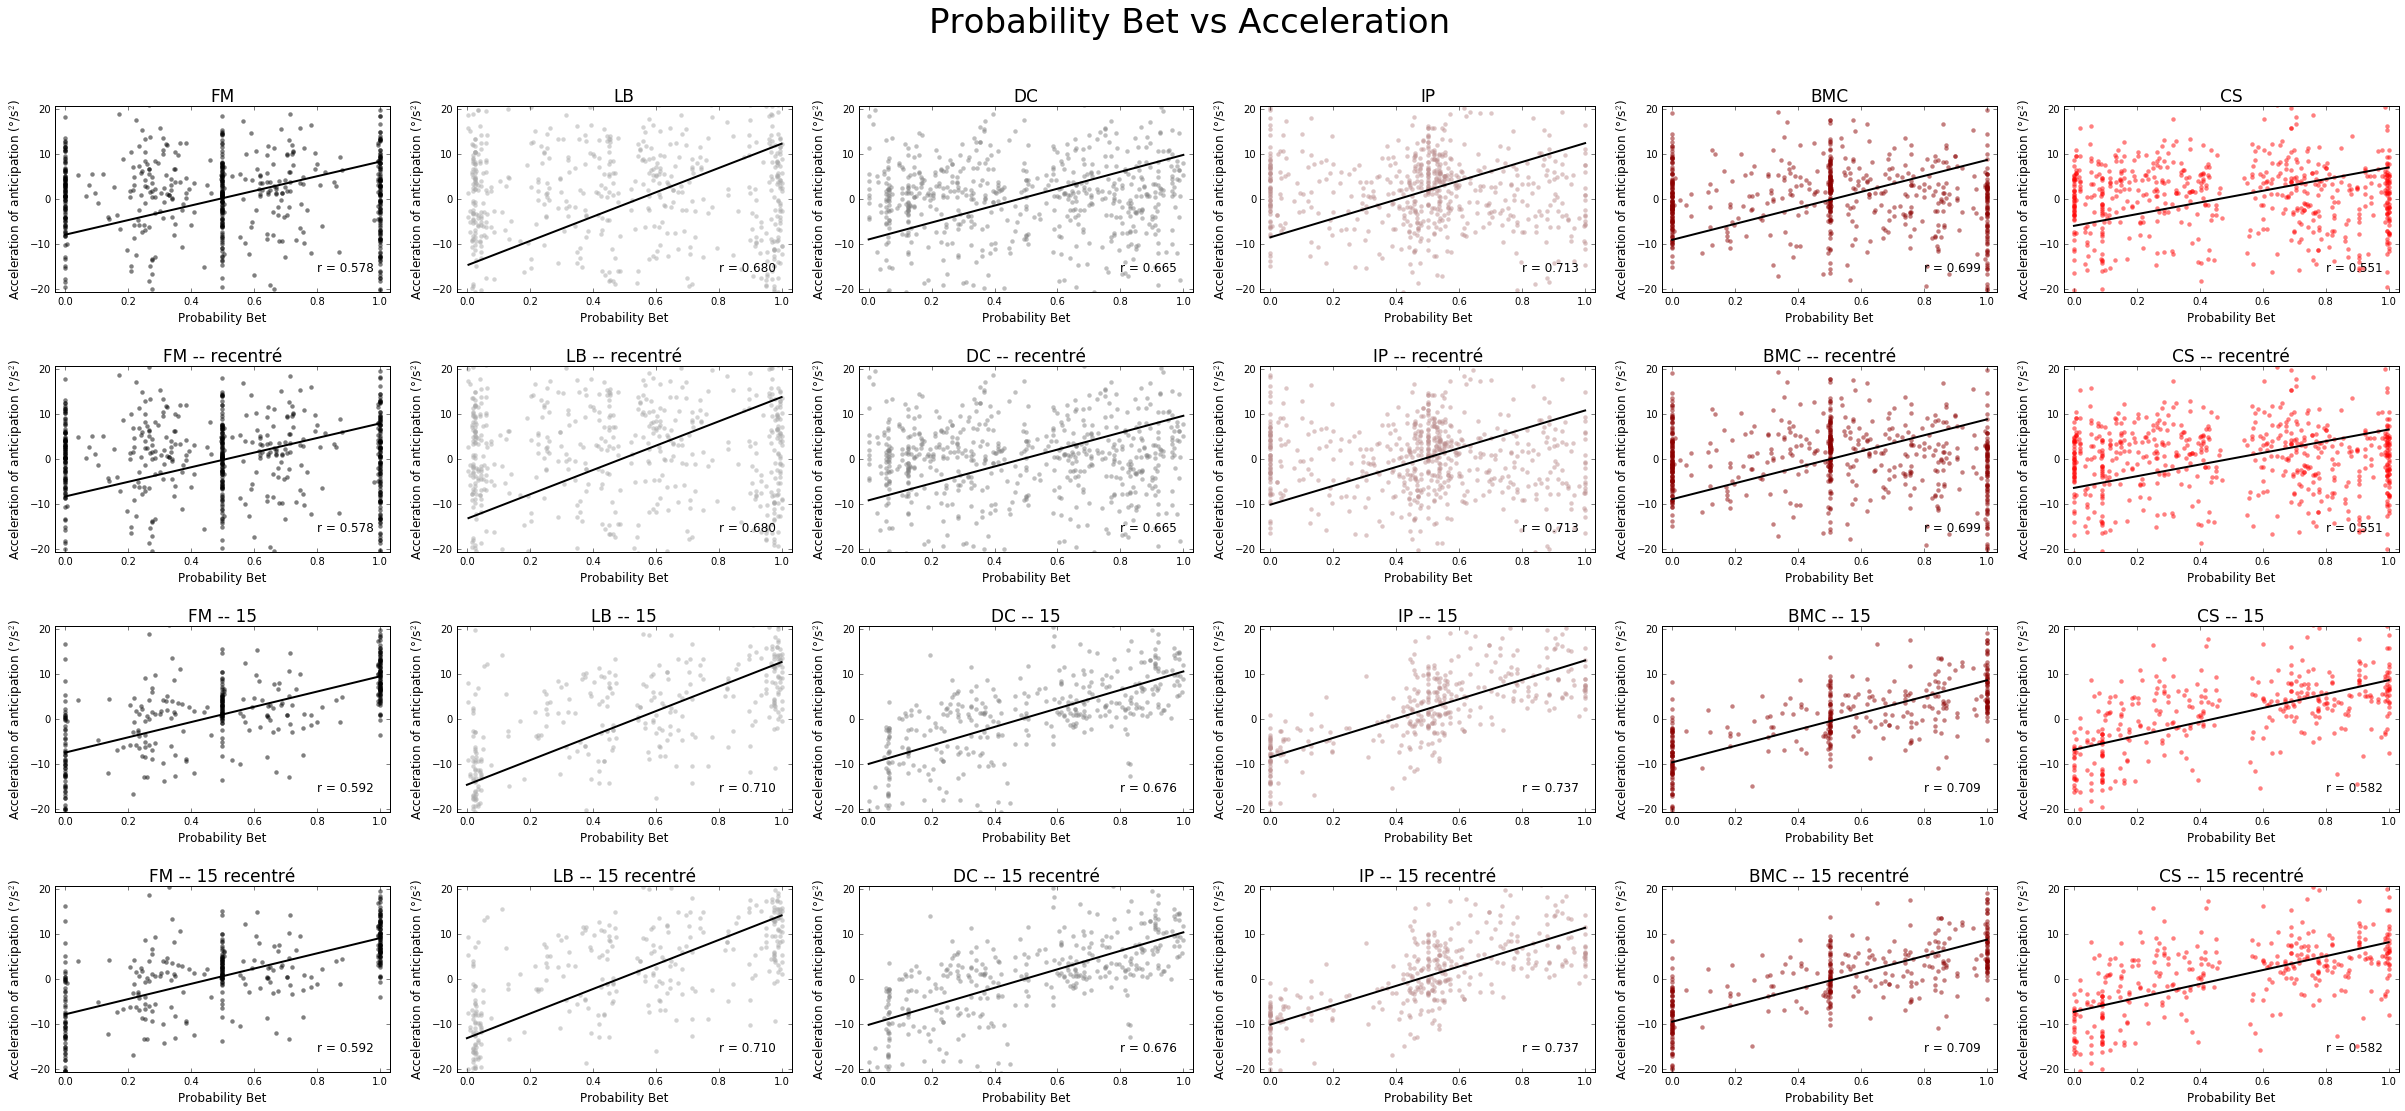

In [15]:
fig, axs = plt.subplots(4, 6, figsize=(fig_width*6, (fig_width*4)/(1.6180)))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Probability Bet vs Acceleration", fontsize=t_titre*2)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):

    axs[0][x].axis([-0.032, 1.032, -20.64, 20.64])
    axs[1][x].axis([-0.032, 1.032, -20.64, 20.64])
    axs[2][x].axis([-0.032, 1.032, -20.64, 20.64])
    axs[3][x].axis([-0.032, 1.032, -20.64, 20.64])

    
    results = (exp[x]['results']+1)/2 # results est sur [-1,1] on le ramene sur [0,1]
    v_anti_0_1 = param[x]['v_anti']
    axs[0][x].scatter(results, v_anti_0_1, c=color, alpha=0.5, linewidths=0)
    axs[1][x].scatter(results, va_refocus[x], c=color, alpha=0.5, linewidths=0)
    
    results_x = block_result_switch_x[x] #(exp[x]['results']+1)/2
    v_anti_0_1_x = block_va_switch_x[x] 
    v_anti_mean = block_va_refocus_switch_x[x]
    axs[2][x].scatter(results_x, v_anti_0_1_x, c=color, alpha=0.5, linewidths=0)
    axs[3][x].scatter(results_x, v_anti_mean, c=color, alpha=0.5, linewidths=0)
    
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(full_results_sujet[x], full_va_sujet[x])
    x_test = np.linspace(np.min(full_results_sujet[x]), np.max(full_results_sujet[x]), 100)
    fitLine = slope * x_test + intercept
    axs[0][x].plot(x_test, fitLine, c='k', linewidth=2)
    axs[0][x].text(0.8,-16, 'r = %0.3f'%(r_value), fontsize=t_label)
    axs[0][x].set_title("%s"%exp[x]['observer'], fontsize=t_titre)
    axs[0][x].set_xlabel('Probability Bet', fontsize=t_label)
    axs[0][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

    slope_c0, intercept_c0, r_value_c0, p_value_c0, std_err_c0 = stats.linregress(full_results_sujet[x], full_va_refocus_sujet[x])
    fitLine_c0 = slope_c0 * x_test + intercept_c0
    axs[1][x].plot(x_test, fitLine_c0, c='k', linewidth=2)
    axs[1][x].text(0.8,-16, 'r = %0.3f'%(r_value_c0), fontsize=t_label)
    axs[1][x].set_title("%s -- recentré"%exp[x]['observer'], fontsize=t_titre)
    axs[1][x].set_xlabel('Probability Bet', fontsize=t_label)
    axs[1][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)


    slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(results_x, v_anti_0_1_x)
    x_test_x = np.linspace(np.min(full_results_x), np.max(full_results_x), 100)
    fitLine_x = slope_x * x_test_x + intercept_x
    axs[2][x].plot(x_test_x, fitLine_x, c='k', linewidth=2)
    axs[2][x].text(0.8,-16, 'r = %0.3f'%(r_value_x), fontsize=t_label)
    axs[2][x].set_title("%s -- 15"%exp[x]['observer'], fontsize=t_titre)
    axs[2][x].set_xlabel('Probability Bet', fontsize=t_label)
    axs[2][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)


    slope_c0_x, intercept_c0_x, r_value_c0_x, p_value_c0_x, std_err_c0_x = stats.linregress(results_x, v_anti_mean)
    fitLine_c0_x = slope_c0_x * x_test_x + intercept_c0_x
    axs[3][x].plot(x_test_x, fitLine_c0_x, c='k', linewidth=2)
    axs[3][x].text(0.8,-16, 'r = %0.3f'%(r_value_c0_x), fontsize=t_label)
    axs[3][x].set_title("%s -- 15 recentré"%exp[x]['observer'], fontsize=t_titre)
    axs[3][x].set_xlabel('Probability Bet', fontsize=t_label)
    axs[3][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

## Probabilité estimé

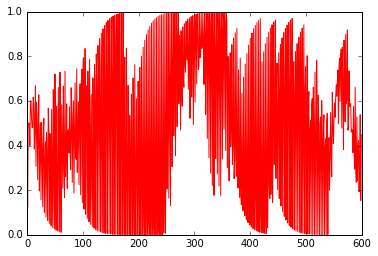

In [16]:
def moving_ave(list_D, tau, p_init=.5, delta=0):
    """
    This function is an agent that infer a P contengencie in function of a pre-established list_D of
    either rightward or leftward trials. p_init means we start from a prior of 50% chance for a target
    to go to each size. Delta = roll
    """
    list_p = p_init*np.ones_like(list_D)
    for i, D in enumerate(list_D[:-1]):
        list_p[i+1] = (1 -  1/tau)*list_p[i] + 1/tau * D
    return np.roll(list_p, delta).flatten()
ploup = exp[0]['p']
plt.plot(moving_ave(ploup[:,:,0], tau=5, delta=2), c='r')

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


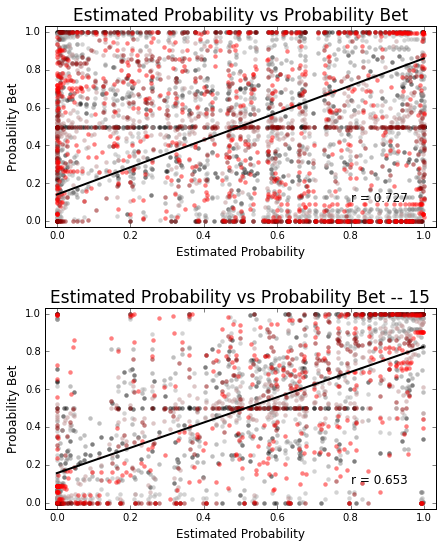

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(fig_width, (fig_width*2)/1.6180))
axs[0].axis([-0.032, 1.032, -0.032, 1.032])
axs[1].axis([-0.032, 1.032, -0.032, 1.032])

plt.subplots_adjust(hspace=0.4)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):

    p = exp[x]['p']
    results = (exp[x]['results']+1)/2 
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    axs[0].scatter(moving_ave(p[:,:,0], tau=5, delta=2), results, c=color, alpha=0.5,linewidths=0)

    binoX = bino_x[x]
    results_x = block_result_switch_x[x] #(exp[x]['results']+1)/2
    axs[1].scatter(moving_ave(binoX, tau=5, delta=2), results_x, c=color, alpha=0.5, linewidths=0)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(moving_ave(full_bino, tau=5, delta=2), full_results)
x_test = np.linspace(np.min(moving_ave(full_bino, tau=5, delta=2)), np.max(moving_ave(full_bino, tau=5, delta=2)), 100)
fitLine = slope * x_test + intercept
axs[0].plot(x_test, fitLine, c='k', linewidth=2)
axs[0].text(0.8,0.1, 'r = %0.3f'%(r_value), fontsize=t_label)
axs[0].set_title(r'Estimated Probability vs Probability Bet', fontsize=t_titre)
axs[0].set_xlabel(r'Estimated Probability', fontsize=t_label)
axs[0].set_ylabel('Probability Bet', fontsize=t_label)


slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(moving_ave(full_bino_x, tau=5, delta=2), full_results_x)
x_test_x = np.linspace(np.min(moving_ave(full_bino_x, tau=5, delta=2)), np.max(moving_ave(full_bino_x, tau=5, delta=2)), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs[1].plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs[1].text(0.8,0.1, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs[1].set_title("Estimated Probability vs Probability Bet -- 15", fontsize=t_titre)
axs[1].set_xlabel('Estimated Probability', fontsize=t_label)
axs[1].set_ylabel('Probability Bet', fontsize=t_label)

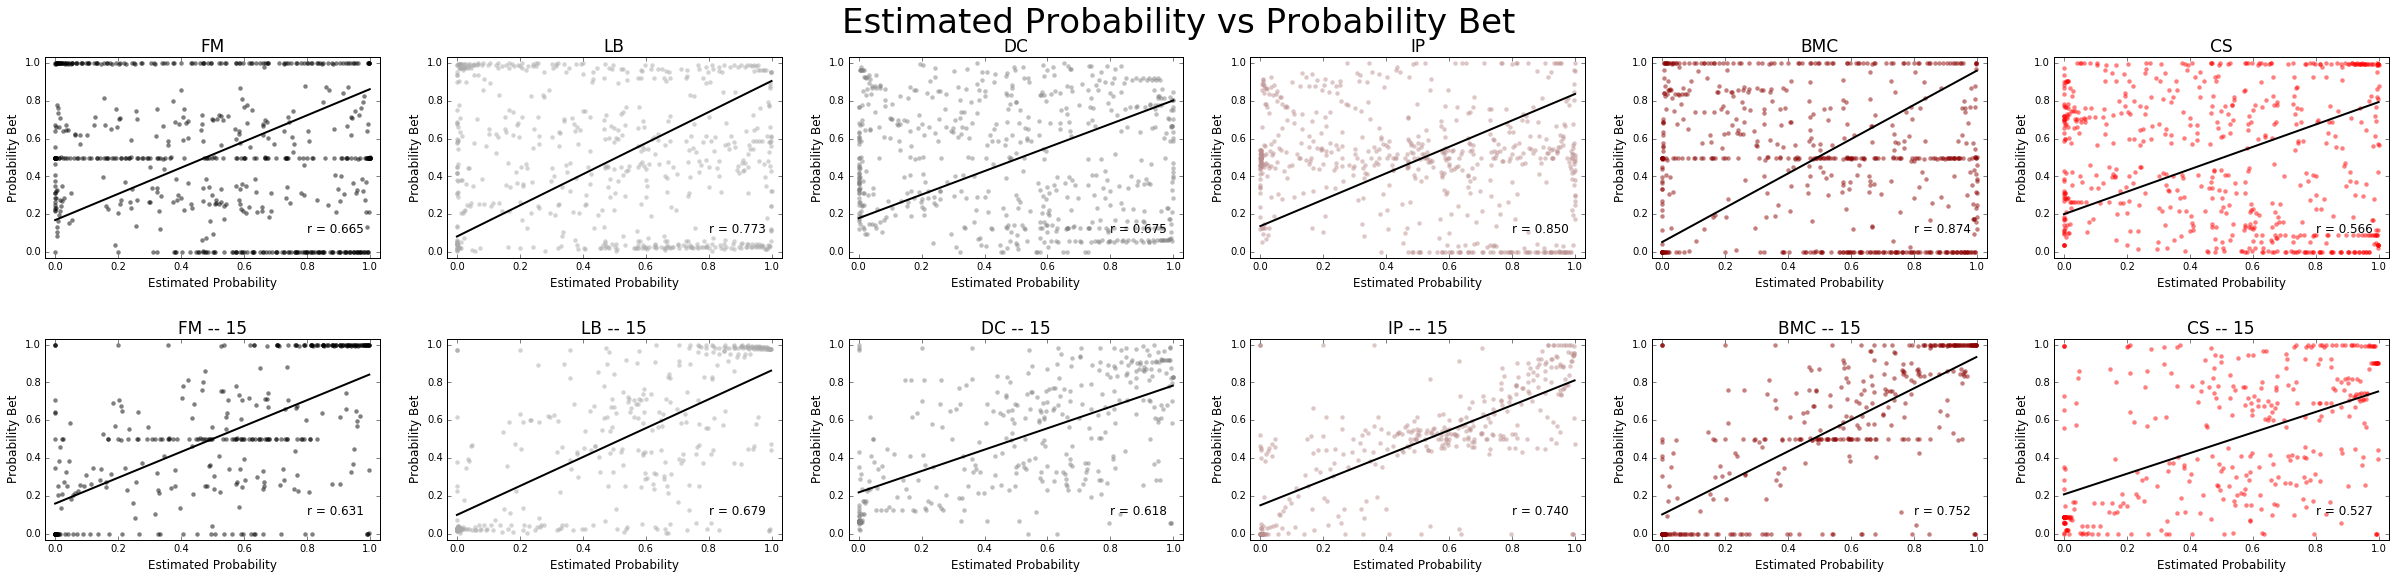

In [18]:
fig, axs = plt.subplots(2, 6, figsize=(fig_width*6, (fig_width*2)/1.6180))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Estimated Probability vs Probability Bet", fontsize=t_titre*2)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    axs[0][x].axis([-0.032, 1.032, -0.032, 1.032])
    axs[1][x].axis([-0.032, 1.032, -0.032, 1.032])
    
    p = exp[x]['p']
    results = (exp[x]['results']+1)/2 
    axs[0][x].scatter(moving_ave(p[:,:,0], tau=5, delta=2), results, c=color, alpha=0.5,linewidths=0)

    binoX = bino_x[x]
    results_x = block_result_switch_x[x] #(exp[x]['results']+1)/2
    axs[1][x].scatter(moving_ave(binoX, tau=5, delta=2), results_x, c=color, alpha=0.5, linewidths=0)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(moving_ave(full_bino_sujet[x], tau=5, delta=2), full_results_sujet[x])
    x_test = np.linspace(np.min(moving_ave(full_bino_sujet[x], tau=5, delta=2)), np.max(moving_ave(full_bino_sujet[x], tau=5, delta=2)), 100)
    fitLine = slope * x_test + intercept
    axs[0][x].plot(x_test, fitLine, c='k', linewidth=2)
    axs[0][x].text(0.8,0.1, 'r = %0.3f'%(r_value), fontsize=t_label)
    axs[0][x].set_title("%s"%exp[x]['observer'], fontsize=t_titre)
    axs[0][x].set_xlabel(r'Estimated Probability', fontsize=t_label)
    axs[0][x].set_ylabel('Probability Bet', fontsize=t_label)


    slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(moving_ave(binoX, tau=5, delta=2), results_x)
    x_test_x = np.linspace(np.min(moving_ave(binoX, tau=5, delta=2)), np.max(moving_ave(binoX, tau=5, delta=2)), 100)
    fitLine_x = slope_x * x_test_x + intercept_x
    axs[1][x].plot(x_test_x, fitLine_x, c='k', linewidth=2)
    axs[1][x].text(0.8,0.1, 'r = %0.3f'%(r_value_x), fontsize=t_label)
    axs[1][x].set_title("%s -- 15"%exp[x]['observer'], fontsize=t_titre)
    axs[1][x].set_xlabel('Estimated Probability', fontsize=t_label)
    axs[1][x].set_ylabel('Probability Bet', fontsize=t_label)

FM 2017-09-26_143606 = black
LB 2017-09-19_152205 = darkgrey
DC 2017-09-26_162348 = grey
IP 2017-09-26_122431 = rosybrown
BMC 2017-09-25_142503 = darkred
CS 2017-09-28_154353 = red


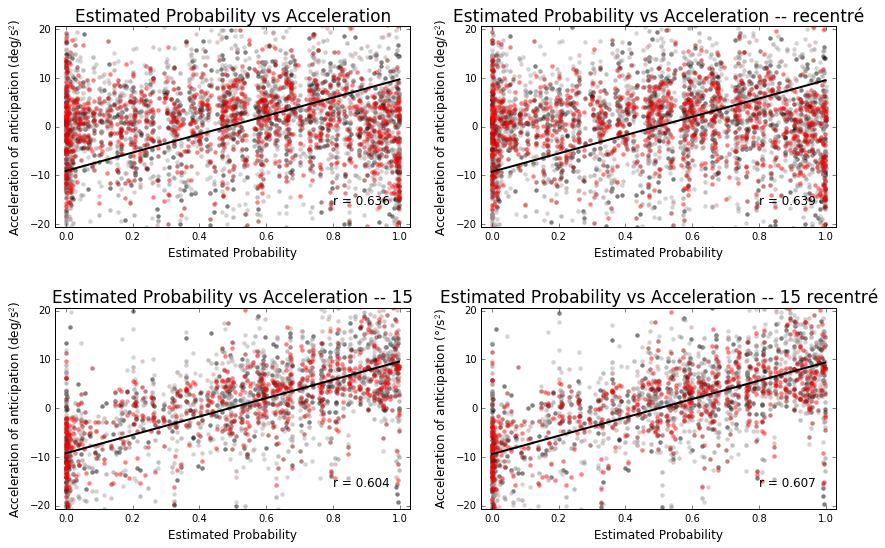

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(fig_width*2, (fig_width*2)/(1.6180)))
axs[0][0].axis([-0.032, 1.032, -20.64, 20.64])
axs[0][1].axis([-0.032, 1.032, -20.64, 20.64])
axs[1][0].axis([-0.032, 1.032, -20.64, 20.64])
axs[1][1].axis([-0.032, 1.032, -20.64, 20.64])

plt.subplots_adjust(hspace=0.4)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    print(exp[x]['observer'], exp[x]['timeStr'], '=',color )
    p = exp[x]['p']
    v_anti_0_1 = param[x]['v_anti']
    axs[0][0].scatter(moving_ave(p[:,:,0], tau=5, delta=2), v_anti_0_1, c=color, alpha=0.5, linewidths=0)
    axs[0][1].scatter(moving_ave(p[:,:,0], tau=5, delta=2), va_refocus[x], c=color, alpha=0.5, linewidths=0)
    
    binoX = bino_x[x]
    v_anti_x = block_va_switch_x[x]
    v_anti_mean = block_va_refocus_switch_x[x]
    axs[1][0].scatter(moving_ave(binoX, tau=5, delta=2), v_anti_x, c=color, alpha=0.5, linewidths=0)
    axs[1][1].scatter(moving_ave(binoX, tau=5, delta=2), v_anti_mean, c=color, alpha=0.5, linewidths=0)
    
    
slope, intercept, r_value, p_value, std_err = stats.linregress(moving_ave(full_bino, tau=5, delta=2), full_va)
x_test = np.linspace(np.min(moving_ave(full_bino, tau=5, delta=2)), np.max(moving_ave(full_bino, tau=5, delta=2)), 100)
fitLine = slope * x_test + intercept
axs[0][0].plot(x_test, fitLine, c='k', linewidth=2)
axs[0][0].text(0.8,-16, 'r = %0.3f'%(r_value), fontsize=t_label)
axs[0][0].set_title("Estimated Probability vs Acceleration", fontsize=t_titre)
axs[0][0].set_xlabel('Estimated Probability', fontsize=t_label)
axs[0][0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

slope_c0, intercept_c0, r_value_c0, p_value_c0, std_err_c0 = stats.linregress(moving_ave(full_bino, tau=5, delta=2), full_va_refocus)
fitLine_c0 = slope_c0 * x_test + intercept_c0
axs[0][1].plot(x_test, fitLine_c0, c='k', linewidth=2)
axs[0][1].text(0.8,-16, 'r = %0.3f'%(r_value_c0), fontsize=t_label)
axs[0][1].set_title("Estimated Probability vs Acceleration -- recentré", fontsize=t_titre)
axs[0][1].set_xlabel('Estimated Probability', fontsize=t_label)
axs[0][1].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)


slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(moving_ave(full_bino_x, tau=5, delta=2), full_va_x)
x_test_x = np.linspace(np.min(moving_ave(full_bino_x, tau=5, delta=2)), np.max(moving_ave(full_bino_x, tau=5, delta=2)), 100)
fitLine_x = slope_x * x_test_x + intercept_x
axs[1][0].plot(x_test_x, fitLine_x, c='k', linewidth=2)
axs[1][0].text(0.8,-16, 'r = %0.3f'%(r_value_x), fontsize=t_label)
axs[1][0].set_title("Estimated Probability vs Acceleration -- 15", fontsize=t_titre)
axs[1][0].set_xlabel('Estimated Probability', fontsize=t_label)
axs[1][0].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

slope_c0_x, intercept_c0_x, r_value_c0_x, p_value_c0_x, std_err_c0_x = stats.linregress(moving_ave(full_bino_x, tau=5, delta=2), full_va_refocus_x)
fitLine_c0_x = slope_c0_x * x_test_x + intercept_c0_x
axs[1][1].plot(x_test_x, fitLine_c0_x, c='k', linewidth=2)
axs[1][1].text(0.8,-16, 'r = %0.3f'%(r_value_c0_x), fontsize=t_label)
axs[1][1].set_title("Estimated Probability vs Acceleration -- 15 recentré", fontsize=t_titre)
axs[1][1].set_xlabel('Estimated Probability', fontsize=t_label)
axs[1][1].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)

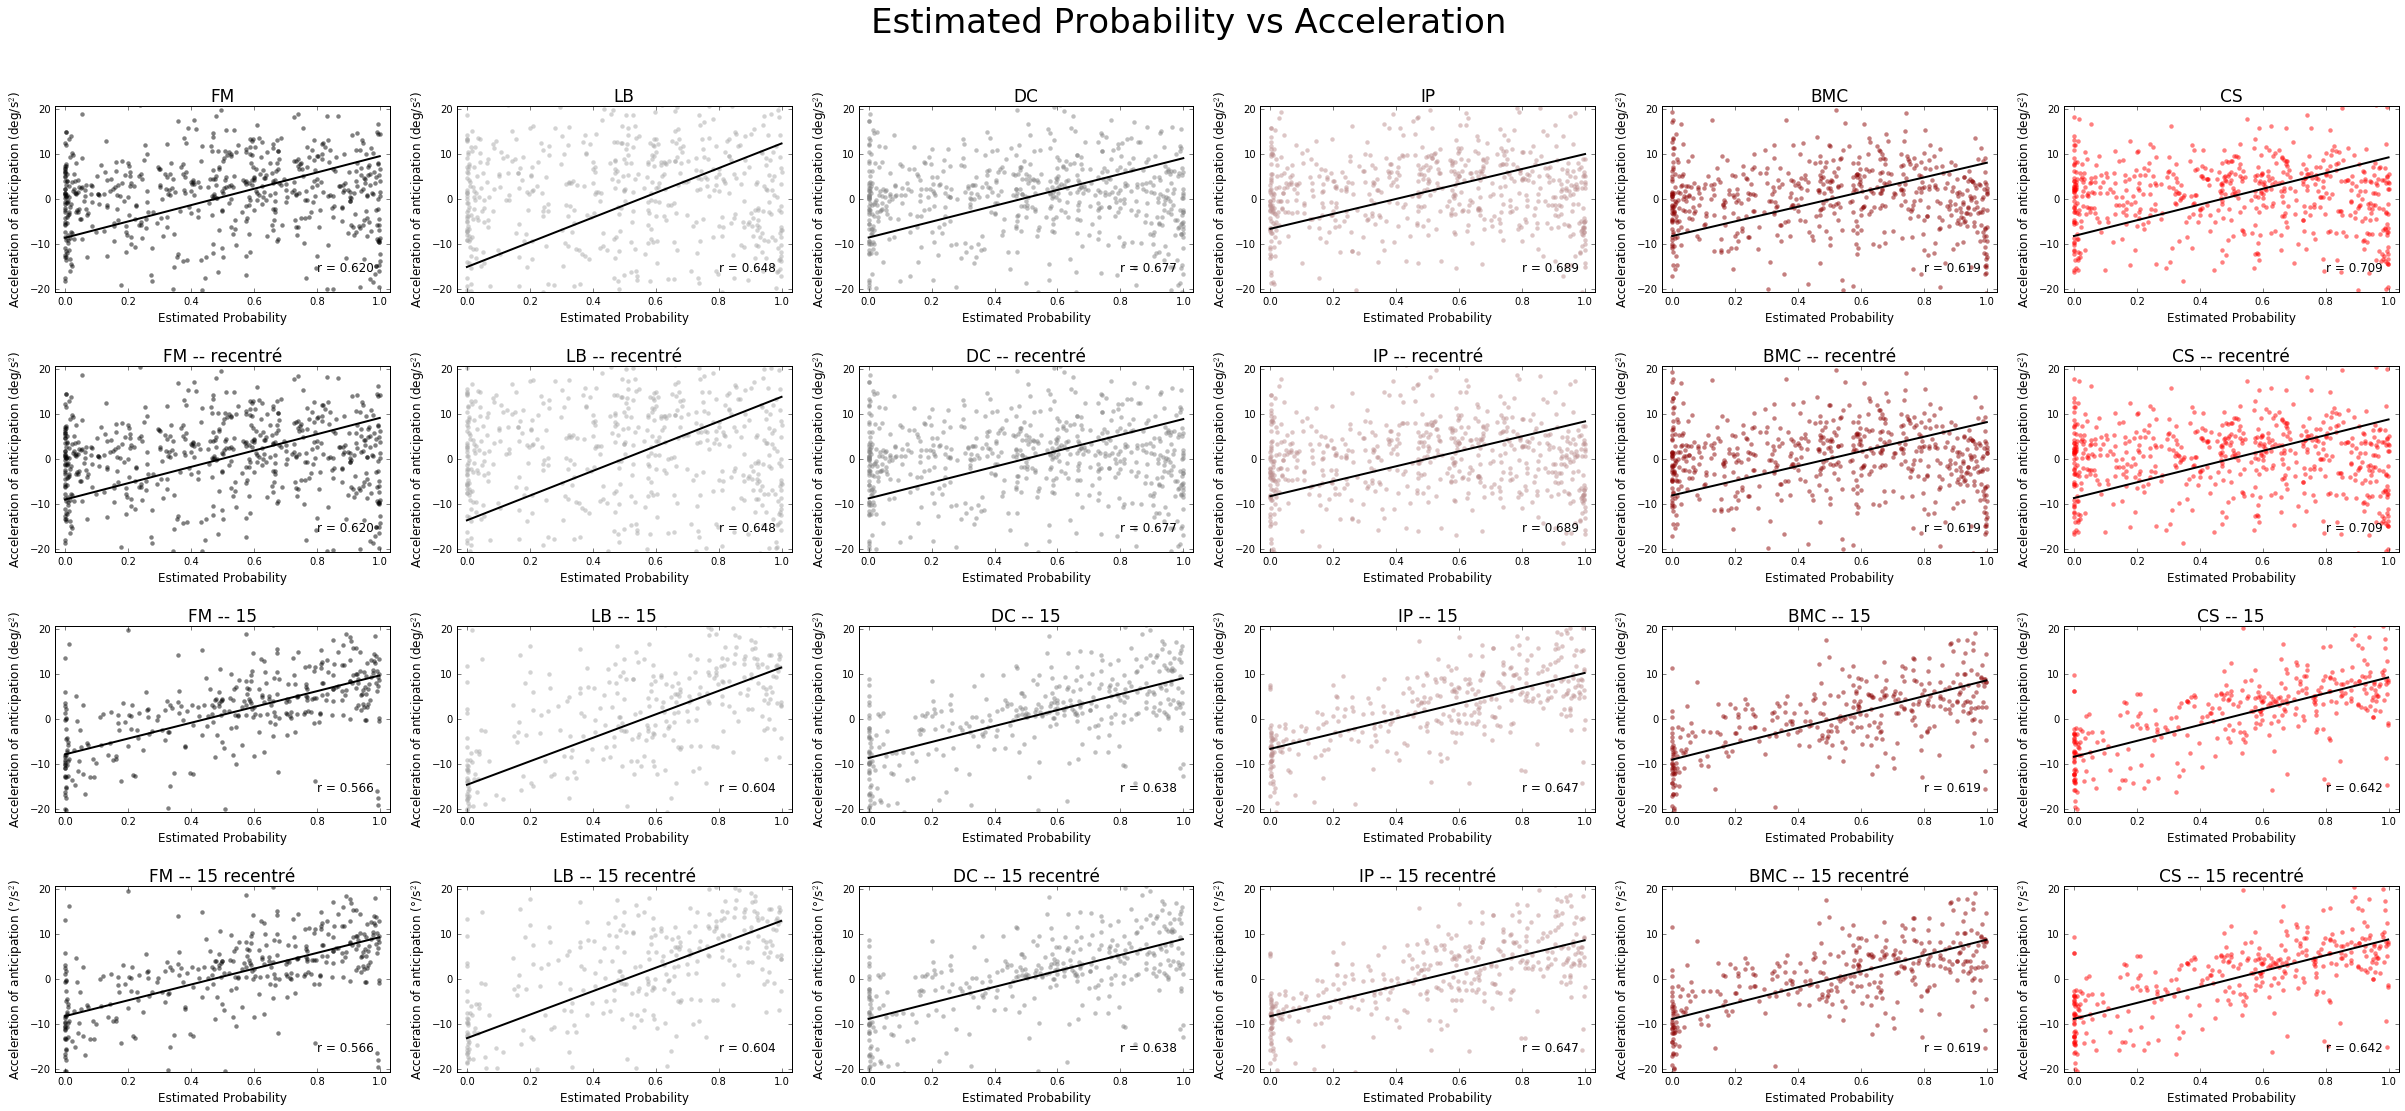

In [20]:
fig, axs = plt.subplots(4, 6, figsize=(fig_width*6, (fig_width*4)/(1.6180)))

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Estimated Probability vs Acceleration", fontsize=t_titre*2)

plt.subplots_adjust(hspace=0.4)

for x, color in enumerate(['black','darkgrey','grey','rosybrown','darkred','red']):
    
    axs[0][x].axis([-0.032, 1.032, -20.64, 20.64])
    axs[1][x].axis([-0.032, 1.032, -20.64, 20.64])
    axs[2][x].axis([-0.032, 1.032, -20.64, 20.64])
    axs[3][x].axis([-0.032, 1.032, -20.64, 20.64])
    
    p = exp[x]['p']
    v_anti_0_1 = param[x]['v_anti']
    axs[0][x].scatter(moving_ave(p[:,:,0], tau=5, delta=2), v_anti_0_1, c=color, alpha=0.5, linewidths=0)
    axs[1][x].scatter(moving_ave(p[:,:,0], tau=5, delta=2), va_refocus[x], c=color, alpha=0.5, linewidths=0)
    
    binoX = bino_x[x]
    v_anti_x = block_va_switch_x[x]
    v_anti_mean = block_va_refocus_switch_x[x]
    axs[2][x].scatter(moving_ave(binoX, tau=5, delta=2), v_anti_x, c=color, alpha=0.5, linewidths=0)
    axs[3][x].scatter(moving_ave(binoX, tau=5, delta=2), v_anti_mean, c=color, alpha=0.5, linewidths=0)
    
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(moving_ave(full_bino_sujet[x], tau=5, delta=2), full_va_sujet[x])
    x_test = np.linspace(np.min(moving_ave(full_bino_sujet[x], tau=5, delta=2)), np.max(moving_ave(full_bino_sujet[x], tau=5, delta=2)), 100)
    fitLine = slope * x_test + intercept
    axs[0][x].plot(x_test, fitLine, c='k', linewidth=2)
    axs[0][x].text(0.8,-16, 'r = %0.3f'%(r_value), fontsize=t_label)
    axs[0][x].set_title("%s"%exp[x]['observer'], fontsize=t_titre)
    axs[0][x].set_xlabel('Estimated Probability', fontsize=t_label)
    axs[0][x].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

    slope_c0, intercept_c0, r_value_c0, p_value_c0, std_err_c0 = stats.linregress(moving_ave(full_bino_sujet[x], tau=5, delta=2), full_va_refocus_sujet[x])
    fitLine_c0 = slope_c0 * x_test + intercept_c0
    axs[1][x].plot(x_test, fitLine_c0, c='k', linewidth=2)
    axs[1][x].text(0.8,-16, 'r = %0.3f'%(r_value_c0), fontsize=t_label)
    axs[1][x].set_title("%s -- recentré"%exp[x]['observer'], fontsize=t_titre)
    axs[1][x].set_xlabel('Estimated Probability', fontsize=t_label)
    axs[1][x].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)


    slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(moving_ave(binoX, tau=5, delta=2), v_anti_x)
    x_test_x = np.linspace(np.min(moving_ave(binoX, tau=5, delta=2)), np.max(moving_ave(binoX, tau=5, delta=2)), 100)
    fitLine_x = slope_x * x_test_x + intercept_x
    axs[2][x].plot(x_test_x, fitLine_x, c='k', linewidth=2)
    axs[2][x].text(0.8,-16, 'r = %0.3f'%(r_value_x), fontsize=t_label)
    axs[2][x].set_title("%s -- 15"%exp[x]['observer'], fontsize=t_titre)
    axs[2][x].set_xlabel('Estimated Probability', fontsize=t_label)
    axs[2][x].set_ylabel('Acceleration of anticipation (deg/s$^2$)', fontsize=t_label)

    slope_c0_x, intercept_c0_x, r_value_c0_x, p_value_c0_x, std_err_c0_x = stats.linregress(moving_ave(binoX, tau=5, delta=2), v_anti_mean)
    fitLine_c0_x = slope_c0_x * x_test_x + intercept_c0_x
    axs[3][x].plot(x_test_x, fitLine_c0_x, c='k', linewidth=2)
    axs[3][x].text(0.8,-16, 'r = %0.3f'%(r_value_c0_x), fontsize=t_label)
    axs[3][x].set_title("%s -- 15 recentré"%exp[x]['observer'], fontsize=t_titre)
    axs[3][x].set_xlabel('Estimated Probability', fontsize=t_label)
    axs[3][x].set_ylabel('Acceleration of anticipation (°/s$^2$)', fontsize=t_label)